In [1]:
import random

import numpy as np

from utils import (
    find_repo_root,
    list_label_dirs,
    plot_mel_grid,
    plot_mel_npy,
    sample_mel_paths,
    sample_mel_paths_by_label,
)

DB_MIN, DB_MAX = -80.0, 0.0

random.seed(1337)
np.random.seed(1337)

REPO_ROOT = find_repo_root()
MELS_ROOT = REPO_ROOT / "data/processed/mels/train" # log_mels/train


# Mel previews


## Random samples


In [2]:
print(f"Mels root: {MELS_ROOT}")
labels = list_label_dirs(MELS_ROOT)
print(f"Labels ({len(labels)}): {labels}")

sample_paths = sample_mel_paths(MELS_ROOT, n=3, seed=1337)
if not sample_paths:
    raise ValueError(f"No .npy files found under {MELS_ROOT}")

for path in sample_paths:
    plot_mel_npy(path, tile="v", db_min=DB_MIN, db_max=DB_MAX)


Mels root: d:\qingchaolaopian\Instrument Sound\GitHub\ml-based-analysis-of-sound\data\processed\mels\train
Labels (0): []


ValueError: No .npy files found under d:\qingchaolaopian\Instrument Sound\GitHub\ml-based-analysis-of-sound\data\processed\mels\train

## One mel per label


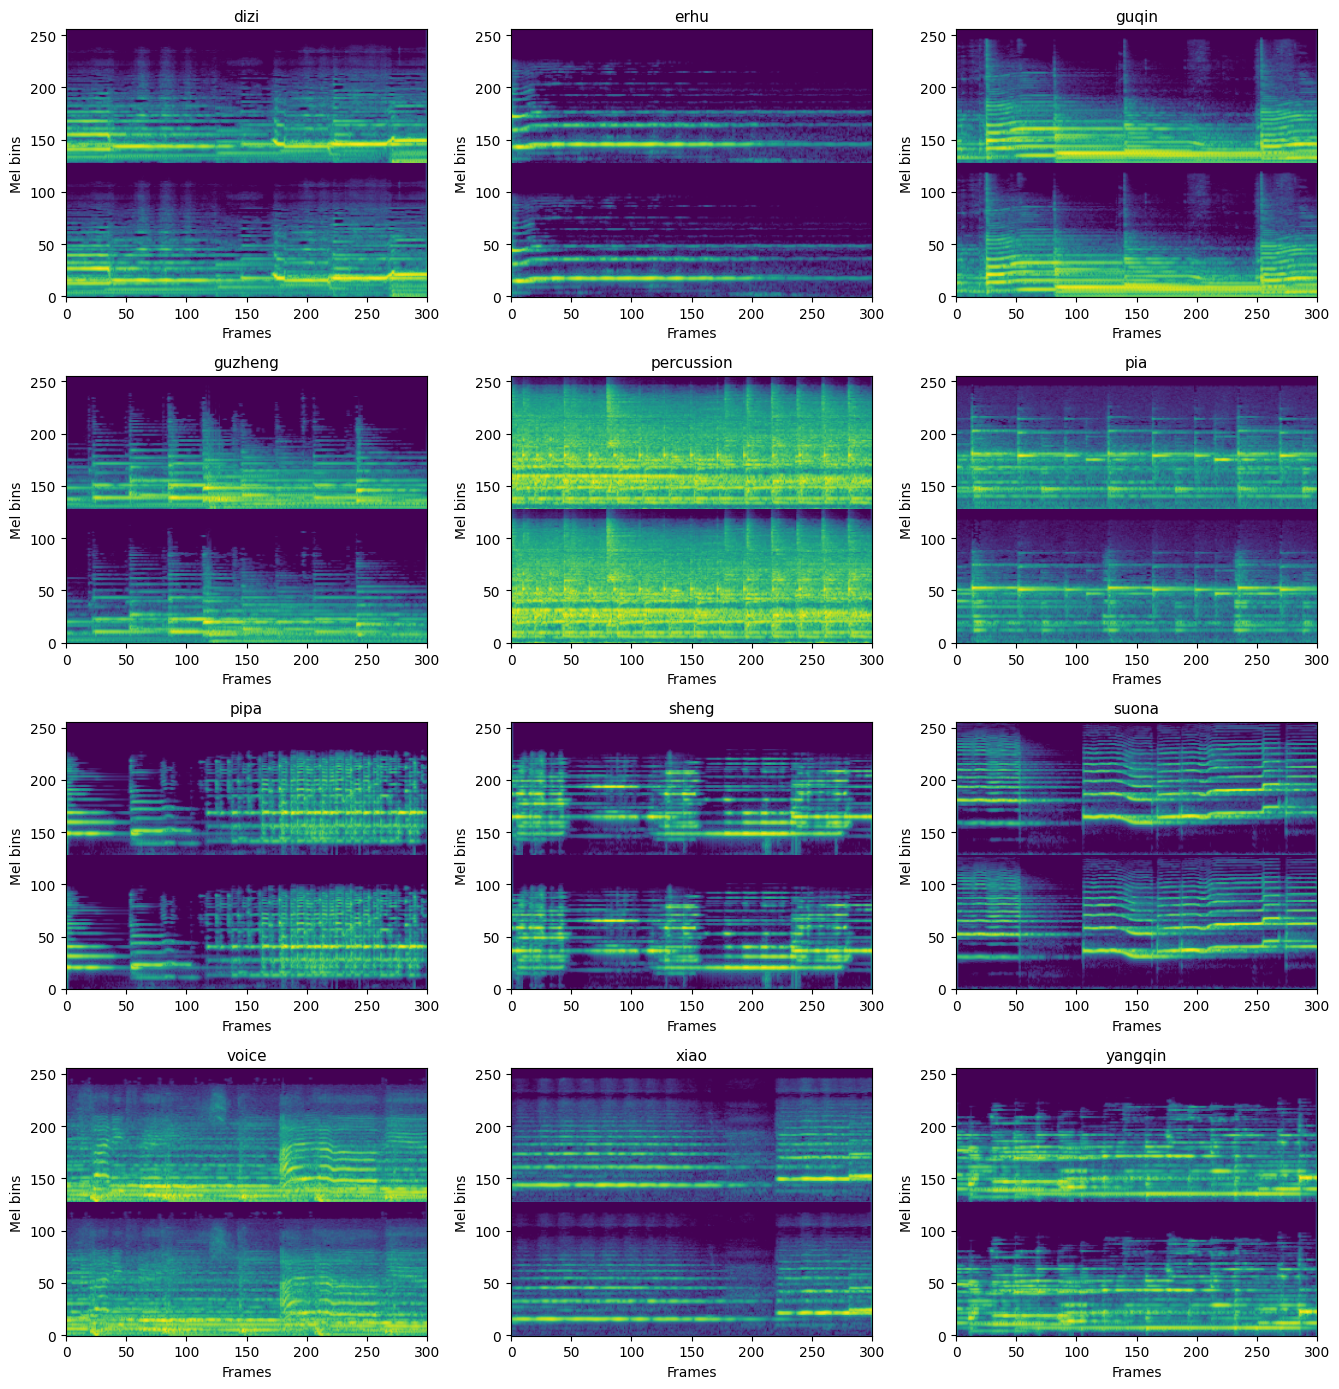

In [ ]:
samples = sample_mel_paths_by_label(MELS_ROOT, seed=1337)
if not samples:
    raise ValueError(f"No labeled .npy files found under {MELS_ROOT}")

plot_mel_grid(
    samples,
    tile="v",
    db_min=DB_MIN,
    db_max=DB_MAX,
    cols=3,
    show_colorbar=False,
)


# Mel + CQT previews (from manifest)


In [ ]:
import pandas as pd
from pathlib import Path

def _read_csv_with_fallback(path):
    encodings = ('utf-8', 'utf-8-sig', 'gbk', 'cp936')
    for enc in encodings:
        try:
            return pd.read_csv(path, encoding=enc)
        except UnicodeDecodeError:
            continue
    return pd.read_csv(path)

def _resolve_path(p, root):
    path = Path(p)
    return path if path.is_absolute() else (root / path).resolve()

def _select_row(df, row_idx=0, sample_id=None):
    if sample_id:
        if 'sample_id' in df.columns:
            match = df[df['sample_id'].astype(str) == sample_id]
            if not match.empty:
                return match.iloc[0]
        if 'filename' in df.columns:
            match = df[df['filename'].astype(str) == sample_id]
            if not match.empty:
                return match.iloc[0]
        if 'wav_path' in df.columns:
            match = df[df['wav_path'].astype(str).apply(lambda s: Path(s).stem) == sample_id]
            if not match.empty:
                return match.iloc[0]
        if 'filepath' in df.columns:
            match = df[df['filepath'].astype(str).apply(lambda s: Path(s).stem) == sample_id]
            if not match.empty:
                return match.iloc[0]
        raise ValueError(f'sample_id not found in manifest: {sample_id}')

    if row_idx < 0 or row_idx >= len(df):
        raise IndexError(f'row_idx out of range: {row_idx} (0..{len(df)-1})')
    return df.iloc[row_idx]

REPO_ROOT = find_repo_root()
MANIFEST_CSV = REPO_ROOT / 'data/processed/train_mels.csv'
ROW_IDX = 0
SAMPLE_ID = None  # optional: filename/stem/sample_id

df = _read_csv_with_fallback(MANIFEST_CSV)
row = _select_row(df, ROW_IDX, SAMPLE_ID)

mel_path = None
if 'filepath' in row and str(row['filepath']).strip():
    mel_path = _resolve_path(str(row['filepath']), REPO_ROOT)
elif 'mel_path' in row and str(row['mel_path']).strip():
    mel_path = _resolve_path(str(row['mel_path']), REPO_ROOT)

cqt_path = None
if 'cqt_path' in row and str(row['cqt_path']).strip():
    cqt_path = _resolve_path(str(row['cqt_path']), REPO_ROOT)

print('Mel:', mel_path)
print('CQT:', cqt_path)


In [ ]:
if mel_path is None:
    raise ValueError('No mel filepath found in manifest row')

plot_mel_npy(mel_path, tile='v', db_min=DB_MIN, db_max=DB_MAX, title='Mel (manifest row)')


In [ ]:
if cqt_path is None:
    raise ValueError('No cqt_path found in manifest row')

plot_mel_npy(cqt_path, tile='v', db_min=DB_MIN, db_max=DB_MAX, title='CQT (manifest row)')
